In [1]:
'''
Generate a synthetic datasets having four classes and 1000 samples using the
following piece of code:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=4,
random_state=0, cluster_std=1.0)

i) Show the scatter plot of the dataset (each class patterns from a different color)
ii) Split the dataset into 75% training and 25% testing patterns.
iii) Apply standard scaler function to normalize the data as per normal distribution.

iv) Apply softmax regression to classify the data into respective classes. 
    - Make use of an appropriate function to show the decision boundaries. 
    - Also show the classification report and Confusion matrix.

v) Apply nonlinear-SVM to classify the test data into respective classes. 
    - Make use of RBF kernel. Plot the decision boundaries. 
    - Also show the classification report and Confusion matrix.

vi) Apply k-NN to classify the test data into respective classes. 
    - Comments on the best suitable value of the parameter “k”.

'''

'\nGenerate a synthetic datasets having four classes and 1000 samples using the\nfollowing piece of code:\n\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom sklearn.datasets import make_blobs\nX, y = make_blobs(n_samples=1000, centers=4,\nrandom_state=0, cluster_std=1.0)\n\ni) Show the scatter plot of the dataset (each class patterns from a different color)\nii) Split the dataset into 75% training and 25% testing patterns.\niii) Apply standard scaler function to normalize the data as per normal distribution.\n\niv) Apply softmax regression to classify the data into respective classes. \n    - Make use of an appropriate function to show the decision boundaries. \n    - Also show the classification report and Confusion matrix.\n\nv) Apply nonlinear-SVM to classify the test data into respective classes. \n    - Make use of RBF kernel. Plot the decision boundaries. \n    - Also show the classification report and Confusion matrix.\n\nvi) Apply k-NN to classify the test data into r

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=4,random_state=0, cluster_std=1.0)

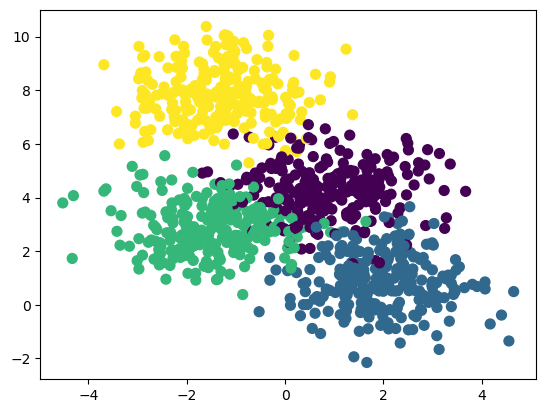

In [3]:
plt.scatter(X[:,0], X[:,1] , c=y, s=50)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.25)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

print(X_train[0:10, :])

[[-0.26652659  1.51070622]
 [ 0.56874934 -0.49305809]
 [-0.94543766  1.62423458]
 [ 1.19981289 -0.81878477]
 [ 0.70819988  0.08244098]
 [ 1.85817798 -0.41834069]
 [-1.67908835  1.37296784]
 [-0.45390104  1.60258106]
 [-1.35118986 -0.29295341]
 [ 0.2017972   0.09927251]]


In [26]:
'''
    - Apply softmax regression to classify the data into respective classes. 
    - Make use of an appropriate function to show the decision boundaries. 
    - Also show the classification report and Confusion matrix.

'''
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression( max_iter=200)
classifier.fit(X_train, y_train) 

LogisticRegression(max_iter=200)

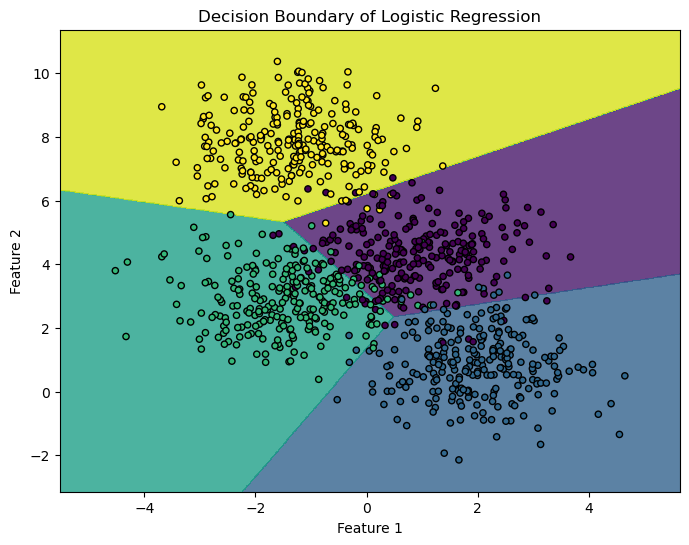

In [27]:
# Create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
 
# Predict the function value for the whole grid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
 
# Plot the contour and training examples
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Logistic Regression')
plt.show()

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[44  1  3  1]
 [ 4 67  1  0]
 [ 3  0 60  0]
 [ 1  0  0 65]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87        49
           1       0.99      0.93      0.96        72
           2       0.94      0.95      0.94        63
           3       0.98      0.98      0.98        66

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.95      0.94      0.94       250



In [10]:
# TO DO : Make use of an appropriate function to show the decision boundaries.

In [11]:
'''
    - Apply nonlinear-SVM to classify the test data into respective classes. 
    - Make use of RBF kernel. 
    - Plot the decision boundaries. 
    - Also show the classification report and Confusion matrix.
'''


'\n    - Apply nonlinear-SVM to classify the test data into respective classes. \n    - Make use of RBF kernel. \n    - Plot the decision boundaries. \n    - Also show the classification report and Confusion matrix.\n'

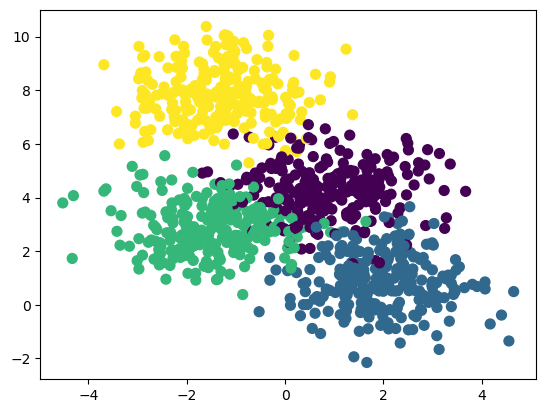

In [12]:
X, y = make_blobs(n_samples=1000, centers=4,random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.25)


In [14]:


#Plotting:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 10)
    y = np.linspace(ylim[0], ylim[1], 10)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)



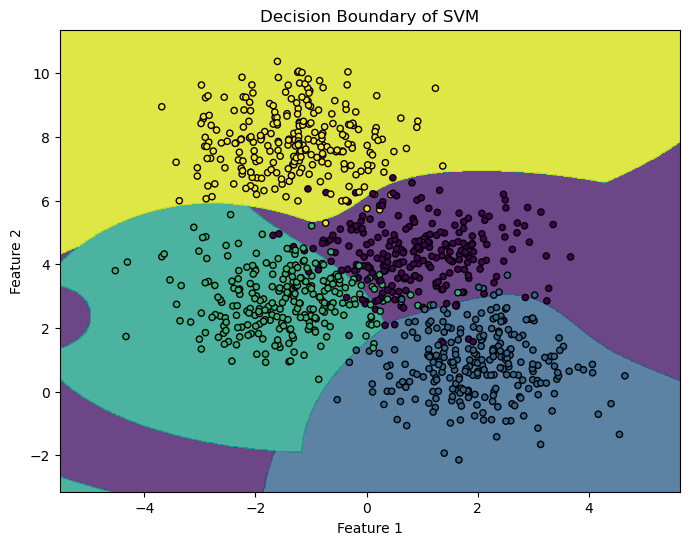

In [25]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

model = SVC(kernel='rbf', C=1000)
model.fit(X_train,y_train)

# Create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
 
# Predict the function value for the whole grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
 
# Plot the contour and training examples
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of SVM')
plt.show()

#plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
#plot_svc_decision_function(model)
#plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
 #          s=300, lw=1, facecolors='none');
    



/Users/divesh.gandhi/anaconda3/lib/python3.11/site-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/Users/divesh.gandhi/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


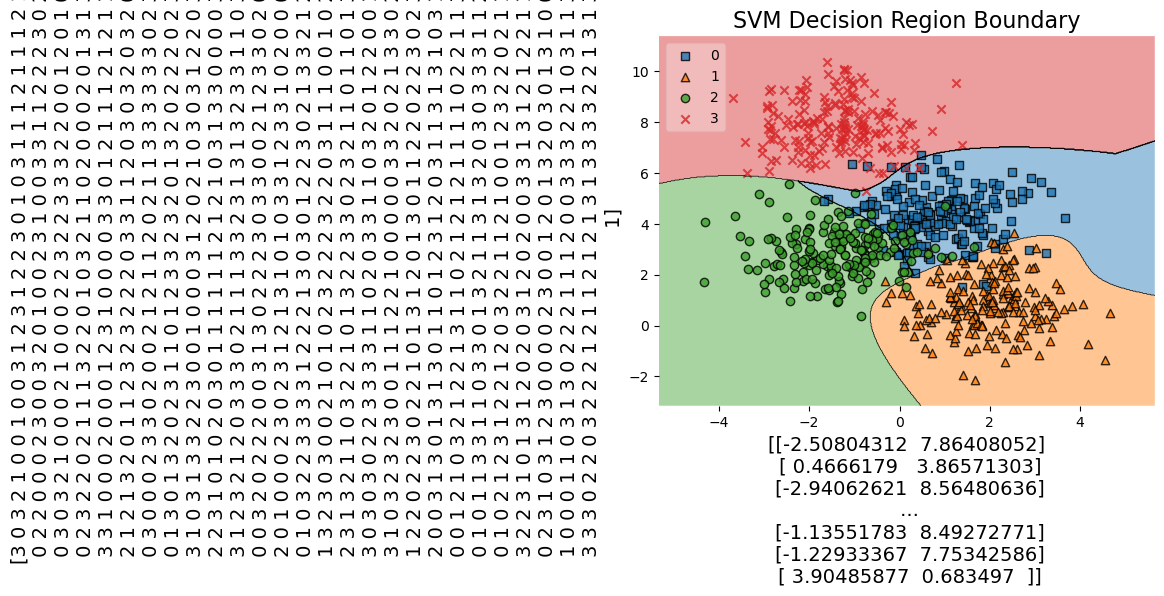

In [16]:
# Alternate method to plot decision boundary for SVM
plot_decision_regions(X=X_train, y=y_train,clf=model,legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X, size=14)
plt.ylabel(y, size=14)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()


In [17]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[52  3  3  1]
 [ 1 63  0  0]
 [ 1  1 59  0]
 [ 2  0  0 64]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90        59
           1       0.94      0.98      0.96        64
           2       0.95      0.97      0.96        61
           3       0.98      0.97      0.98        66

    accuracy                           0.95       250
   macro avg       0.95      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250



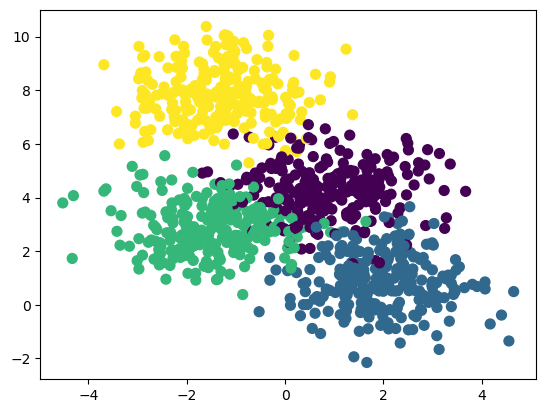

In [19]:
'''
    - Apply k-NN to classify the test data into respective classes. 
    - Comments on the best suitable value of the parameter “k”.

'''
X, y = make_blobs(n_samples=1000, centers=4,random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);



In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.25)


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8) # k = 8 ( highest accuracy ) ( random to start with  ), distance = 'Eucledian'
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [22]:
# Predict
y_pred = knn.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[61  2  1  0]
 [ 3 53  1  0]
 [ 7  1 49  0]
 [ 0  0  0 72]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        64
           1       0.95      0.93      0.94        57
           2       0.96      0.86      0.91        57
           3       1.00      1.00      1.00        72

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



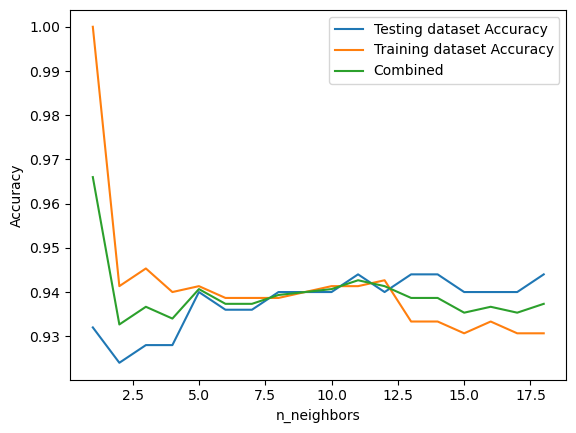

In [23]:
# Choosing the Best K-Value:
neighbors = np.arange(1, 19)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
Sum = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
      
    # Compute traning and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    Sum[i]=train_accuracy[i]+test_accuracy[i]
  
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.plot(neighbors, Sum/2, label = 'Combined')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [24]:
# we start with random K = 5 and then plotted the accuracy graph and observed that accuracy is high when k=8